## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\joaqu\anaconda3\envs\book\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\joaqu\anaconda3\envs\book\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5049 - acc: 0.7877 - val_loss: 0.3800 - val_acc: 0.8687
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2977 - acc: 0.9047 - val_loss: 0.3239 - val_acc: 0.8718
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2174 - acc: 0.9296 - val_loss: 0.2851 - val_acc: 0.8871
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1721 - acc: 0.9446 - val_loss: 0.3023 - val_acc: 0.8806
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1412 - acc: 0.9549 - val_loss: 0.2814 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1124 - acc: 0.9665 - val_loss: 0.2956 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0928 - acc: 0.9728 - val_loss: 0.3143 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0736 - a

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6206 - acc: 0.6753 - val_loss: 0.5584 - val_acc: 0.6877
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5146 - acc: 0.8035 - val_loss: 0.5132 - val_acc: 0.7783
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4666 - acc: 0.8671 - val_loss: 0.4891 - val_acc: 0.8751
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4330 - acc: 0.8999 - val_loss: 0.4702 - val_acc: 0.8741
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4081 - acc: 0.9210 - val_loss: 0.4788 - val_acc: 0.8416
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3853 - acc: 0.9350 - val_loss: 0.4643 - val_acc: 0.8651
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3672 - acc: 0.9467 - val_loss: 0.4606 - val_acc: 0.8709
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3502 - a

## Analizamos resultados

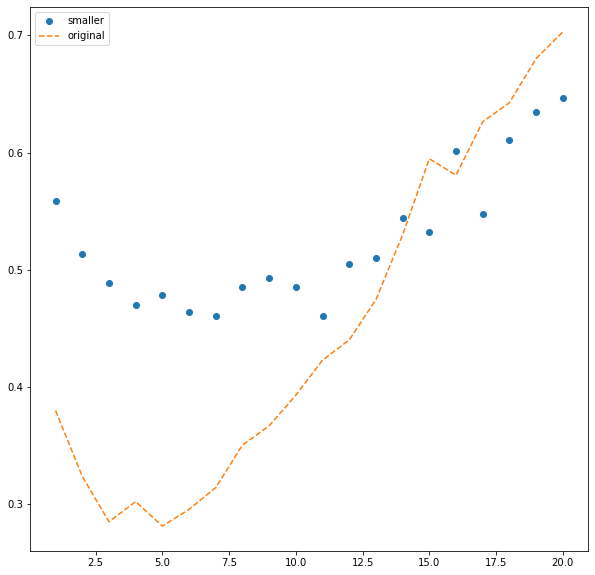

In [13]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularización

In [14]:
from keras import regularizers

In [15]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6026 - acc: 0.7634 - val_loss: 0.5002 - val_acc: 0.8565
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4131 - acc: 0.8929 - val_loss: 0.3943 - val_acc: 0.8774
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3284 - acc: 0.9149 - val_loss: 0.3577 - val_acc: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2836 - acc: 0.9264 - val_loss: 0.3365 - val_acc: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2539 - acc: 0.9365 - val_loss: 0.3405 - val_acc: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2375 - acc: 0.9412 - val_loss: 0.3357 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2254 - acc: 0.9447 - val_loss: 0.3447 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2106 - a

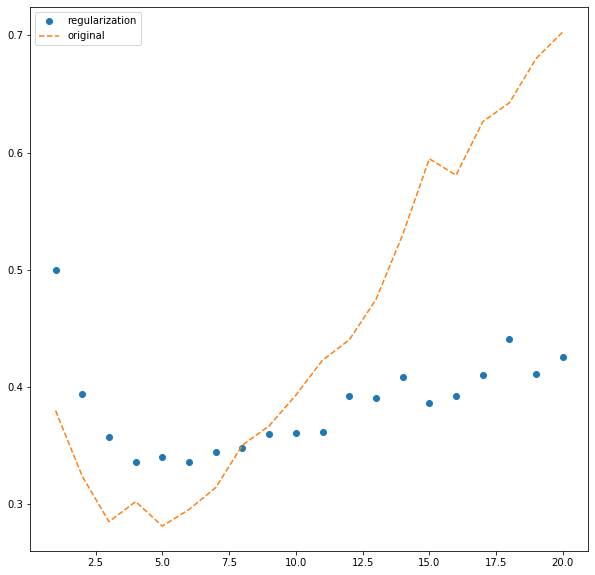

In [18]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [19]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [21]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6220 - acc: 0.6473 - val_loss: 0.5095 - val_acc: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5044 - acc: 0.7701 - val_loss: 0.4236 - val_acc: 0.8458
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4183 - acc: 0.8305 - val_loss: 0.3325 - val_acc: 0.8850
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3530 - acc: 0.8674 - val_loss: 0.3010 - val_acc: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3077 - acc: 0.8894 - val_loss: 0.2784 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2708 - acc: 0.9094 - val_loss: 0.2754 - val_acc: 0.8913
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2384 - acc: 0.9203 - val_loss: 0.2736 - val_acc: 0.8914
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2119 - a

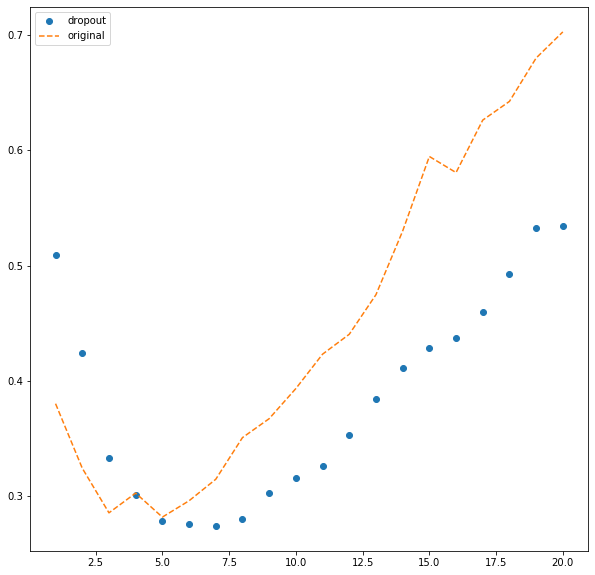

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()